## Importing Packages 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math


%matplotlib inline
%reload_ext autoreload
%autoreload 2

## Reading Training Data

In [2]:
pd.set_option("display.max_columns", None)
train_df = pd.read_csv(r"C:\Users\Mandulat\Documents\DA Training\Kaggle Titanic\train.csv")
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data Cleaning

In [4]:
# adding a new column with full terms of the abbreviations used (pclass, embarked) using .map

train_df['Pclass_long'] = train_df['Pclass'].map({1 :'1st Class', 2: '2nd Class', 3: '3rd Class'})

train_df['Embarked_long'] = train_df['Embarked'].map({"C" :"Cherbourg", "Q" : "Queenstown", "S" : "Southampton" })


In [5]:
# train_df_test[['Pclass_long','Embarked_long']].head(10)
train_df[['Pclass','Pclass_long']].head(10)

,Pclass,Pclass_long
0,3,3rd Class
1,1,1st Class
2,3,3rd Class
3,1,1st Class
4,3,3rd Class
5,3,3rd Class
6,1,1st Class
7,3,3rd Class
8,3,3rd Class
9,2,2nd Class


In [6]:
train_df['Age_clean'] = train_df['Age'].apply(lambda x : int(math.ceil(x)) if pd.notnull(x) else np.nan )

train_df[(train_df['Age']<1)][['Age','Age_clean']]


,Age,Age_clean
78,0.83,1.0
305,0.92,1.0
469,0.75,1.0
644,0.75,1.0
755,0.67,1.0
803,0.42,1.0
831,0.83,1.0


In [7]:
train_df['Sex'] = train_df['Sex'].map({"male":"Male", "female":"Female"})

## Basic Feature Engineering

### Age Brackets

In [8]:
train_df['Age_clean'].describe()

count    714.000000
mean      29.714286
std       14.526453
min        1.000000
25%       20.250000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age_clean, dtype: float64

In [9]:
train_df["Age Bracket"] = np.where((1 <=train_df['Age_clean']) & (train_df['Age_clean'] <= 12),"Child",None)
train_df["Age Bracket"] = np.where((13 <=train_df['Age_clean']) & (train_df['Age_clean'] <= 18),"Teen",train_df["Age Bracket"])
train_df["Age Bracket"] = np.where((19 <=train_df['Age_clean']) & (train_df['Age_clean'] <= 35),"Young Adult",train_df["Age Bracket"])
train_df["Age Bracket"] = np.where((36 <=train_df['Age_clean']) & (train_df['Age_clean'] <= 55),"Middle-Aged Adult",train_df["Age Bracket"])
train_df["Age Bracket"] = np.where((56 <=train_df['Age_clean']),"Older Adult",train_df["Age Bracket"])

train_df["Age Bracket"].value_counts()

Young Adult          358
Middle-Aged Adult    177
Teen                  70
Child                 69
Older Adult           40
Name: Age Bracket, dtype: int64

### Cabin Type

In [10]:
train_df["Cabin Type"] = train_df["Cabin"].apply(lambda x: x[0] if pd.notnull(x) else None)

train_df["Cabin Type"].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin Type, dtype: int64

### Marital Status

In [11]:
train_df["Marital Status"] = np.where((train_df["Name"].str.contains("Mr.", regex=False)|train_df["Name"].str.contains("Mrs.", regex=False) |train_df["Name"].str.contains("Mrs", regex=False) |train_df["Name"].str.contains("Mr", regex=False)),"Married",None)
train_df["Marital Status"] = np.where((train_df["Name"].str.contains("Master.", regex=False)|train_df["Name"].str.contains("Miss.", regex=False)|train_df["Name"].str.contains("Ms", regex=False)),"Single",train_df["Marital Status"])


train_df['Marital Status'].value_counts()


Married    645
Single     223
Name: Marital Status, dtype: int64

### Spouses OB

In [12]:
# Spouses OB

# NO spouse, NO sibs
train_df["Spouses OB"] = np.where((train_df["Marital Status"] == "Married") & (train_df["SibSp"] == 0),0,np.nan)

# YES spouse, NO sibs
train_df["Spouses OB"] = np.where((train_df["Marital Status"] == "Single"),0,train_df["Spouses OB"])

# YES spouse, YES sibs
train_df["Spouses OB"] = np.where((train_df["Marital Status"] == "Married") & (train_df["SibSp"] == 1),1,train_df["Spouses OB"])

# NO spouse, NO sibs
train_df["Spouses OB"] = np.where((train_df["Marital Status"] == "Married") & (train_df["SibSp"] > 1),1,train_df["Spouses OB"])



### Siblings OB

In [13]:
# Siblings OB

# YES spouse, YES sibs
train_df["Siblings OB"] = np.where((train_df["Marital Status"] == "Married") & (train_df["SibSp"] > 1),train_df["SibSp"].apply(lambda x : x -1 if pd.notnull(x) else 0 ),np.nan)

# NO spouse, YES sibs
train_df["Siblings OB"] = np.where((train_df["Marital Status"] == "Single") & (train_df["SibSp"] > 0),train_df["SibSp"],train_df["Siblings OB"])

# NO spouse, NO sibs
train_df["Siblings OB"] = np.where((train_df["Marital Status"] == "Married") & (train_df["SibSp"] == 0),0,train_df["Siblings OB"])

# YES spouse, NO sibs
train_df["Siblings OB"] = np.where((train_df["Marital Status"] == "Married") & (train_df["SibSp"] == 1),0,train_df["Siblings OB"])

# NO spouse, NO sibs
train_df["Siblings OB"] = np.where((train_df["Marital Status"] == "Single") & (train_df["SibSp"] == 0),0,train_df["Siblings OB"])

### Parents OB

In [14]:
# Parents OB

# Married
train_df["Parents OB"] = np.where((train_df["Marital Status"] == "Married"),0,np.nan)

# Single
train_df["Parents OB"] = np.where((train_df["Marital Status"] == "Single"),train_df["Parch"],train_df["Parents OB"])

### Children OB

In [15]:
# Children OB

# Married
train_df["Children OB"] = np.where((train_df["Marital Status"] == "Married"),train_df["Parch"],np.nan)

# Single
train_df["Children OB"] = np.where((train_df["Marital Status"] == "Single"),0,train_df["Children OB"])

In [16]:
# feature engineering QCing

train_df[["Name","SibSp","Parch","Marital Status","Spouses OB","Siblings OB","Parents OB","Children OB"]].loc[0:10]

,Name,SibSp,Parch,Marital Status,Spouses OB,Siblings OB,Parents OB,Children OB
0,"Braund, Mr. Owen Harris",1,0,Married,1.0,0.0,0.0,0.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,Married,1.0,0.0,0.0,0.0
2,"Heikkinen, Miss. Laina",0,0,Single,0.0,0.0,0.0,0.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,Married,1.0,0.0,0.0,0.0
4,"Allen, Mr. William Henry",0,0,Married,0.0,0.0,0.0,0.0
5,"Moran, Mr. James",0,0,Married,0.0,0.0,0.0,0.0
6,"McCarthy, Mr. Timothy J",0,0,Married,0.0,0.0,0.0,0.0
7,"Palsson, Master. Gosta Leonard",3,1,Single,0.0,3.0,1.0,0.0
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,2,Married,0.0,0.0,0.0,2.0
9,"Nasser, Mrs. Nicholas (Adele Achem)",1,0,Married,1.0,0.0,0.0,0.0


In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   Pclass          891 non-null    int64  
 3   Name            891 non-null    object 
 4   Sex             891 non-null    object 
 5   Age             714 non-null    float64
 6   SibSp           891 non-null    int64  
 7   Parch           891 non-null    int64  
 8   Ticket          891 non-null    object 
 9   Fare            891 non-null    float64
 10  Cabin           204 non-null    object 
 11  Embarked        889 non-null    object 
 12  Pclass_long     891 non-null    object 
 13  Embarked_long   889 non-null    object 
 14  Age_clean       714 non-null    float64
 15  Age Bracket     714 non-null    object 
 16  Cabin Type      204 non-null    object 
 17  Marital Status  868 non-null    obj

In [18]:
clean_df = train_df[["Name","Age_clean","Age Bracket","Sex","Marital Status","Spouses OB","Siblings OB","Parents OB","Children OB","Fare","Pclass_long","Embarked_long","Cabin Type","Survived"]].copy()

clean_df.head(10)


,Name,Age_clean,Age Bracket,Sex,Marital Status,Spouses OB,Siblings OB,Parents OB,Children OB,Fare,Pclass_long,Embarked_long,Cabin Type,Survived
0,"Braund, Mr. Owen Harris",22.0,Young Adult,Male,Married,1.0,0.0,0.0,0.0,7.2500,3rd Class,Southampton,None,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,Middle-Aged Adult,Female,Married,1.0,0.0,0.0,0.0,71.2833,1st Class,Cherbourg,C,1
2,"Heikkinen, Miss. Laina",26.0,Young Adult,Female,Single,0.0,0.0,0.0,0.0,7.9250,3rd Class,Southampton,None,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,Young Adult,Female,Married,1.0,0.0,0.0,0.0,53.1000,1st Class,Southampton,C,1
4,"Allen, Mr. William Henry",35.0,Young Adult,Male,Married,0.0,0.0,0.0,0.0,8.0500,3rd Class,Southampton,None,0
5,"Moran, Mr. James",NaN,None,Male,Married,0.0,0.0,0.0,0.0,8.4583,3rd Class,Queenstown,None,0
6,"McCarthy, Mr. Timothy J",54.0,Middle-Aged Adult,Male,Married,0.0,0.0,0.0,0.0,51.8625,1st Class,Southampton,E,0
7,"Palsson, Master. Gosta Leonard",2.0,Child,Male,Single,0.0,3.0,1.0,0.0,21.0750,3rd Class,Southampton,None,0
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,Young Adult,Female,Married,0.0,0.0,0.0,2.0,11.1333,3rd Class,Southampton,None,1
9,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,Teen,Female,Married,1.0,0.0,0.0,0.0,30.0708,2nd Class,Cherbourg,None,1


In [19]:
clean_df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

## Exploratory Data Analysis 

### Fare

<Figure size 720x432 with 0 Axes>

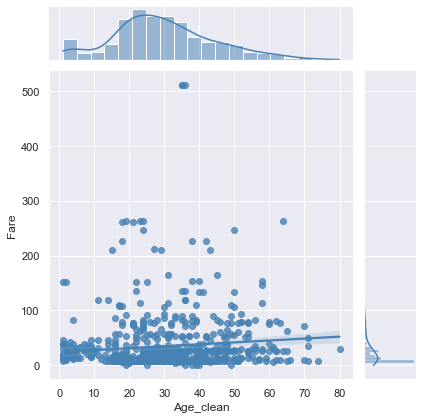

In [20]:
plt.figure(figsize=(10,6))
sns.set_theme()
sns.jointplot(x='Age_clean', y='Fare',data=clean_df,color='steelblue', kind='reg')

      Embarked     Sex      amax    amin  len       Fare
0    Cherbourg  Female  512.3292  7.2250   73  75.169805
1    Cherbourg    Male  512.3292  4.0125   95  48.262109
2   Queenstown  Female   90.0000  6.7500   36  12.634958
3   Queenstown    Male   90.0000  6.7500   41  13.838922
4  Southampton  Female  263.0000  7.2500  203  38.740929
5  Southampton    Male  263.0000  0.0000  441  21.711996


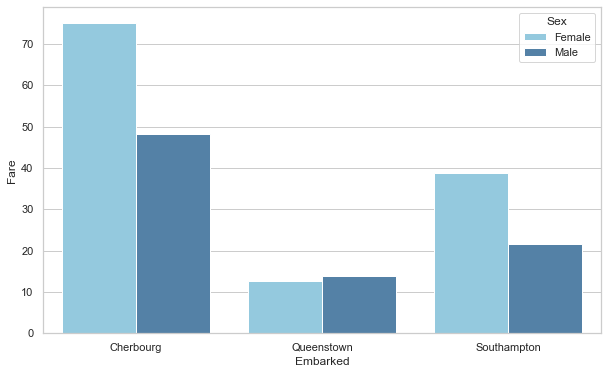

In [21]:
table = pd.pivot_table(clean_df,index=['Embarked_long','Sex'],aggfunc={'Fare':[np.mean,len,np.min,np.max]}).reset_index()
table

table.columns = table.columns.droplevel(0)
table.columns.values[0] = 'Embarked'
table.columns.values[1] = 'Sex'
table.columns.values[5] = 'Fare'
print(table)

plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Embarked", y="Fare", hue="Sex", palette={'Female':'skyblue','Male':'steelblue'}, data=table)


  Marital Status     Sex      amax    amin  len       Fare
0        Married  Female  247.5208  7.2250  127  45.129298
1        Married    Male  512.3292  0.0000  518  24.504277
2         Single  Female  512.3292  6.7500  183  43.629578
3         Single    Male  151.5500  8.5167   40  34.703125


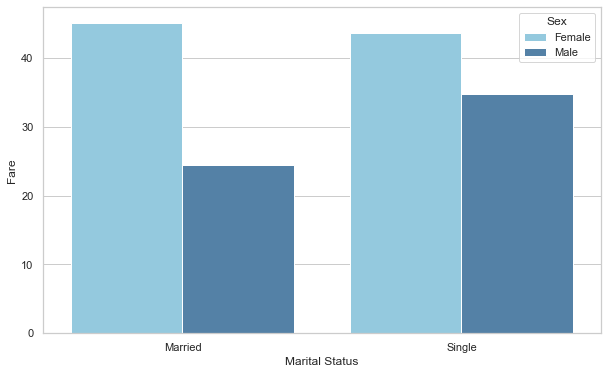

In [22]:
table = pd.pivot_table(clean_df[(clean_df['Marital Status'].notnull())],index=['Marital Status','Sex'],aggfunc={'Fare':[np.mean,len,np.min,np.max]}).reset_index()
# table
table.columns = table.columns.droplevel(0)
table.columns.values[0] = 'Marital Status'
table.columns.values[1] = 'Sex'
table.columns.values[5] = 'Fare'
print(table)

plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Marital Status", y="Fare", hue="Sex", palette={'Female':'skyblue','Male':'steelblue'}, data=table)

       Class     Sex      amax     amin  len        Fare
0  1st Class  Female  512.3292  25.9292   94  106.125798
1  1st Class    Male  512.3292   0.0000  122   67.226127
2  2nd Class  Female   65.0000  10.5000   76   21.970121
3  2nd Class    Male   73.5000   0.0000  108   19.741782
4  3rd Class  Female   69.5500   6.7500  144   16.118810
5  3rd Class    Male   69.5500   0.0000  347   12.661633


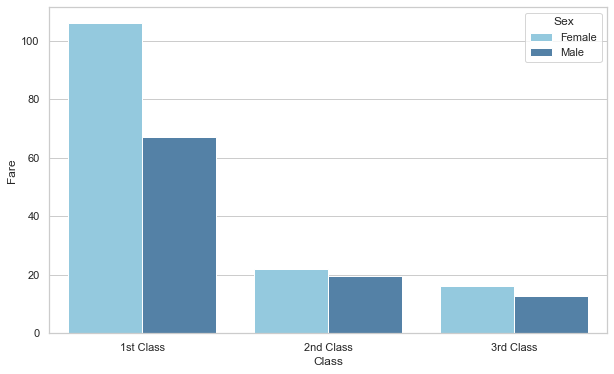

In [34]:
table = pd.pivot_table(clean_df[(clean_df['Pclass_long'].notnull())],index=['Pclass_long','Sex'],aggfunc={'Fare':[np.mean,len,np.min,np.max]}).reset_index()

table.columns = table.columns.droplevel(0)
table.columns.values[0] = 'Class'
table.columns.values[1] = 'Sex'
table.columns.values[5] = 'Fare'
print(table)

plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Class", y="Fare",hue='Sex', palette={'Female':'skyblue','Male':'steelblue'},data=table)


         Age Bracket      amax    amin  len       Fare
0              Child  151.5500  8.5167   69  31.536352
1  Middle-Aged Adult  512.3292  0.0000  177  43.579497
2        Older Adult  263.0000  6.2375   40  45.680728
3               Teen  262.3750  6.4958   70  33.451313
4        Young Adult  512.3292  0.0000  358  29.925929


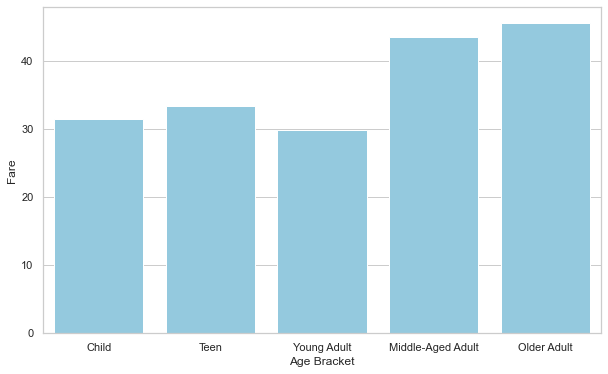

In [24]:
table = pd.pivot_table(clean_df[(clean_df['Age Bracket'].notnull())],index=['Age Bracket'],aggfunc={'Fare':[np.mean,len,np.min,np.max]}).reset_index()
table

table.columns = table.columns.droplevel(0)
table.columns.values[0] = 'Age Bracket'
table.columns.values[4] = 'Fare'
print(table)

plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Age Bracket", y="Fare", order=['Child','Teen','Young Adult','Middle-Aged Adult','Older Adult'] ,color='skyblue',data=table)

### Survival

<Figure size 720x288 with 0 Axes>

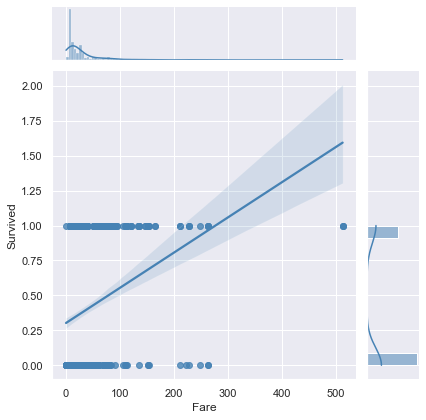

In [25]:
plt.figure(figsize=(10,4))
sns.set_theme()
sns.jointplot(x='Fare', y='Survived',data=clean_df,color='steelblue', kind='reg')

      Embarked     Sex    len  Survived %
0    Cherbourg  Female   73.0    0.876712
1    Cherbourg    Male   95.0    0.305263
2   Queenstown  Female   36.0    0.750000
3   Queenstown    Male   41.0    0.073171
4  Southampton  Female  203.0    0.689655
5  Southampton    Male  441.0    0.174603


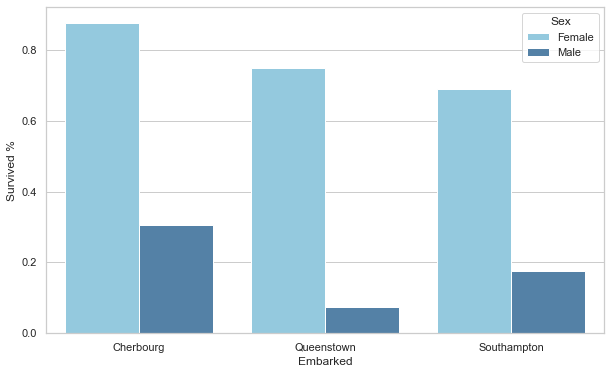

In [26]:
table = pd.pivot_table(clean_df,index=['Embarked_long','Sex'],aggfunc={'Survived':[np.mean,len]}).reset_index()
table

table.columns = table.columns.droplevel(0)
table.columns.values[0] = 'Embarked'
table.columns.values[1] = 'Sex'
table.columns.values[3] = 'Survived %'
print(table)

plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Embarked", y="Survived %", hue="Sex", palette={'Female':'skyblue','Male':'steelblue'}, data=table)

  Marital Status     Sex    len  Survived %
0        Married  Female  127.0    0.795276
1        Married    Male  518.0    0.158301
2         Single  Female  183.0    0.699454
3         Single    Male   40.0    0.575000


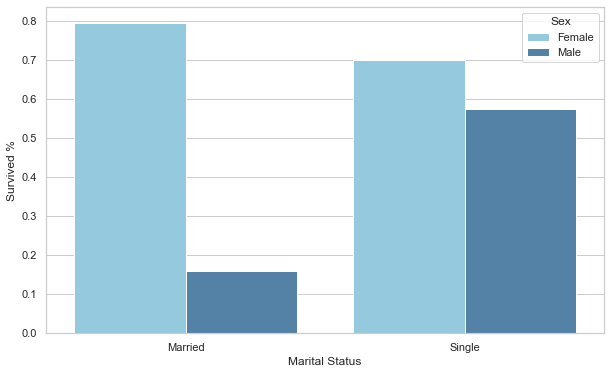

In [27]:
table = pd.pivot_table(clean_df[(clean_df['Marital Status'].notnull())],index=['Marital Status','Sex'],aggfunc={'Survived':[np.mean,len]}).reset_index()
table

table.columns = table.columns.droplevel(0)
table.columns.values[0] = 'Marital Status'
table.columns.values[1] = 'Sex'
table.columns.values[3] = 'Survived %'
print(table)

plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Marital Status", y="Survived %", hue="Sex", palette={'Female':'skyblue','Male':'steelblue'}, data=table)

       Class     Sex    len  Survival %
0  1st Class  Female   94.0    0.968085
1  1st Class    Male  122.0    0.368852
2  2nd Class  Female   76.0    0.921053
3  2nd Class    Male  108.0    0.157407
4  3rd Class  Female  144.0    0.500000
5  3rd Class    Male  347.0    0.135447


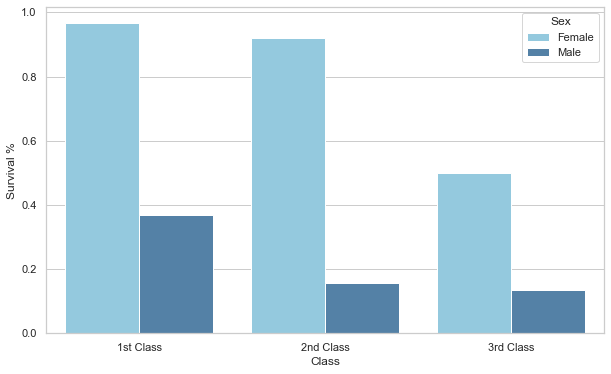

In [36]:
table = pd.pivot_table(clean_df[(clean_df['Pclass_long'].notnull())],index=['Pclass_long','Sex'],aggfunc={'Survived':[np.mean,len]}).reset_index()

table.columns = table.columns.droplevel(0)
table.columns.values[0] = 'Class'
table.columns.values[1] = 'Sex'
table.columns.values[3] = 'Survival %'
print(table)

plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Class", y="Survival %",hue='Sex', palette={'Female':'skyblue','Male':'steelblue'},data=table)

         Age Bracket     Sex    len  Survived %
0              Child  Female   32.0    0.593750
1              Child    Male   37.0    0.567568
2  Middle-Aged Adult  Female   64.0    0.765625
3  Middle-Aged Adult    Male  113.0    0.194690
4        Older Adult  Female    9.0    0.888889
5        Older Adult    Male   31.0    0.129032
6               Teen  Female   36.0    0.750000
7               Teen    Male   34.0    0.088235
8        Young Adult  Female  120.0    0.783333
9        Young Adult    Male  238.0    0.180672


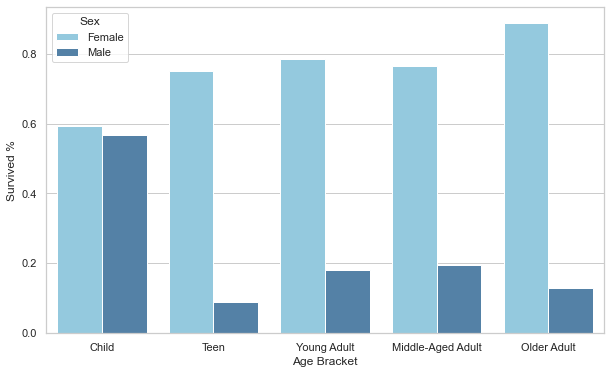

In [29]:
table = pd.pivot_table(clean_df[(clean_df['Age Bracket'].notnull())],index=['Age Bracket','Sex'],aggfunc={'Survived':[np.mean,len]}).reset_index()
table

table.columns = table.columns.droplevel(0)
table.columns.values[0] = 'Age Bracket'
table.columns.values[1] = 'Sex'
table.columns.values[3] = 'Survived %'
print(table)


plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Age Bracket", y="Survived %", order=['Child','Teen','Young Adult','Middle-Aged Adult','Older Adult'],hue='Sex', palette={'Female':'skyblue','Male':'steelblue'},data=table)

   Spouses OB    len  Survived %
0           0  682.0    0.370968
1           1  186.0    0.435484


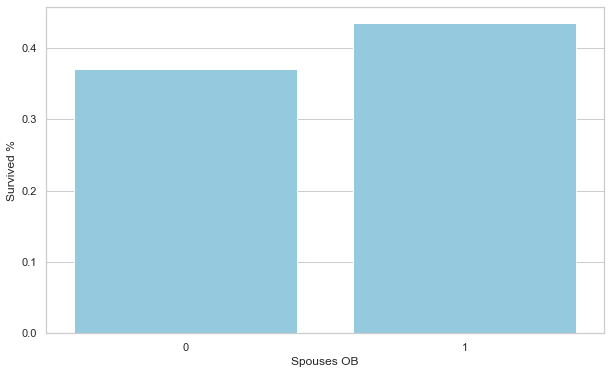

In [48]:
table = pd.pivot_table(clean_df,index=['Spouses OB'],aggfunc={'Survived':[np.mean,len]}).reset_index()
table

table.columns = table.columns.droplevel(0)
table.columns.values[0] = 'Spouses OB'
table.columns.values[2] = 'Survived %'
table['Spouses OB'] = table['Spouses OB'].astype(int)
print(table)

plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Spouses OB", y="Survived %", color='skyblue',data=table)


   Siblings OB    len  Survived %
0            0  751.0    0.370173
1            1   60.0    0.683333
2            2   14.0    0.714286
3            3   15.0    0.133333
4            4   17.0    0.176471
5            5    4.0    0.000000
6            7    3.0    0.000000
7            8    4.0    0.000000


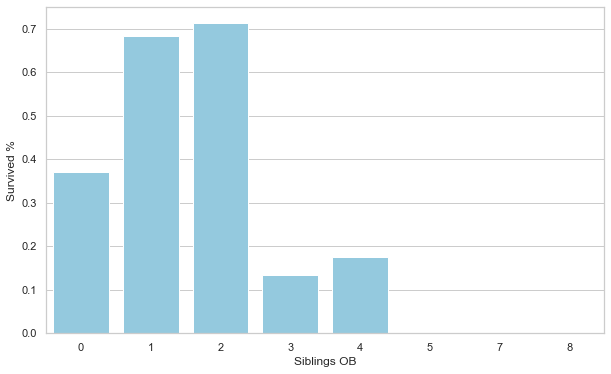

In [49]:
table = pd.pivot_table(clean_df,index=['Siblings OB'],aggfunc={'Survived':[np.mean,len]}).reset_index()
table

table.columns = table.columns.droplevel(0)
table.columns.values[0] = 'Siblings OB'
table.columns.values[2] = 'Survived %'
table['Siblings OB'] = table['Siblings OB'].astype(int)
print(table)

plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Siblings OB", y="Survived %", color='skyblue',data=table)

    Children OB     Sex    len  Survived %
0             0  Female  254.0    0.744094
1             0    Male  506.0    0.193676
2             1  Female   32.0    0.812500
3             1    Male   33.0    0.151515
4             2  Female   13.0    0.769231
5             2    Male   15.0    0.133333
6             3  Female    4.0    0.750000
7             3    Male    1.0    0.000000
8             4  Female    2.0    0.000000
9             4    Male    2.0    0.000000
10            5  Female    4.0    0.250000
11            5    Male    1.0    0.000000
12            6  Female    1.0    0.000000


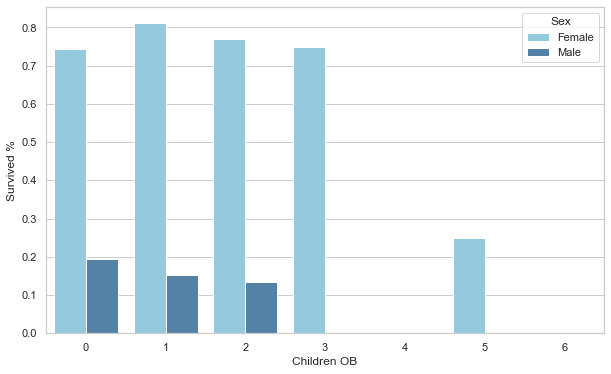

In [53]:
table = pd.pivot_table(clean_df,index=['Children OB','Sex'],aggfunc={'Survived':[np.mean,len]}).reset_index()
table

table.columns = table.columns.droplevel(0)
table.columns.values[0] = 'Children OB'
table.columns.values[1] = 'Sex'
table.columns.values[3] = 'Survived %'
table['Children OB'] = table['Children OB'].astype(int)
print(table)

plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Children OB", y="Survived %",hue='Sex', palette={'Female':'skyblue','Male':'steelblue'},data=table)



#check if more moms were saved than dads

   Parents OB    len  Survived %
0           0  765.0    0.355556
1           1   51.0    0.666667
2           2   52.0    0.538462


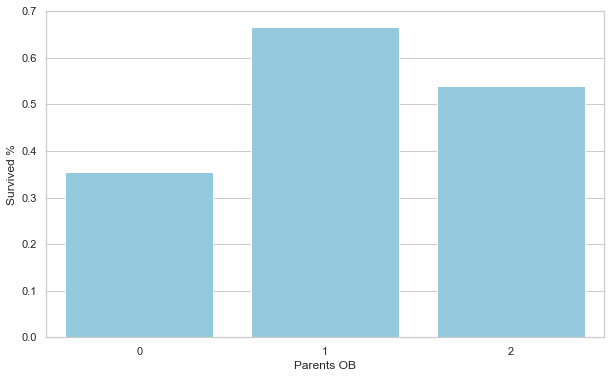

In [54]:
table = pd.pivot_table(clean_df,index=['Parents OB'],aggfunc={'Survived':[np.mean,len]}).reset_index()
table

table.columns = table.columns.droplevel(0)
table.columns.values[0] = 'Parents OB'
table.columns.values[2] = 'Survived %'
table['Parents OB'] = table['Parents OB'].astype(int)
print(table)

plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Parents OB", y="Survived %", color='skyblue',data=table)